# PA2 of CSE 251B, WI 21

## (a) Load training and testing data then create a validation split from the training data.

In [16]:
from neuralnet import *
from random import shuffle
import numpy as np

class Cross_Validation():
    def __init__(self, x, y, k):
        datas = []
        labels = []
        self.k = k
        shuffle_index = np.random.permutation(x.shape[0])
        self.datas = np.array_split(x[shuffle_index], k)
        self.labels = np.array_split(y[shuffle_index], k)
        
    def data(self):
        for i in range(self.k):
            datas = list(self.datas)
            labels = list(self.labels)
            x_val = datas.pop(i)
            y_val = labels.pop(i)
            x_train = np.concatenate(datas, axis=0)
            y_train = np.concatenate(labels, axis=0)

            yield x_train, y_train, x_val, y_val




# Load the configuration.
config = load_config("./")

# Create the model
model  = Neuralnetwork(config)

 # Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)

## (c) Cross Validation

In [17]:
# load and split data
x, y = load_data(path="./", mode="train")
x, y = load_data(path="./", mode="t10k")
datasets = Cross_Validation(x, y, 5)

# load model para
config_c = yaml.load(open('./config.yaml', 'r'), Loader=yaml.SafeLoader)



# Train the model with cross validation
max_test_accu = 0
for k, (x_train, y_train, x_valid, y_valid) in enumerate(datasets.data()):

    model_c = Neuralnetwork(config_c)
    recording = train(model_c, x_train, y_train, x_valid, y_valid, config_c)
    
    # Recall parameters with minimum validation loss
    model_c.load_para()
    test_accuracy = test(model_c, x_test, y_test)
    max_test_accu = max(max_test_accu, test_accuracy)
        
print('max test accuracy: {:.4f}'.format(max_test_accu))

Epoch 1, Time 0.15599799156188965 seconds
Train_loss = 11.7838, Valid_loss = 10.8662, Valid_accuracy = 0.0780
Epoch 2, Time 0.32199811935424805 seconds
Train_loss = 10.0278, Valid_loss = 9.4222, Valid_accuracy = 0.1005
Epoch 3, Time 0.47699737548828125 seconds
Train_loss = 8.7313, Valid_loss = 8.3597, Valid_accuracy = 0.1285
Epoch 4, Time 0.6449992656707764 seconds
Train_loss = 7.7630, Valid_loss = 7.5270, Valid_accuracy = 0.1465
Epoch 5, Time 0.7929980754852295 seconds
Train_loss = 6.9679, Valid_loss = 6.8843, Valid_accuracy = 0.1695
Epoch 6, Time 0.9329993724822998 seconds
Train_loss = 6.3286, Valid_loss = 6.3362, Valid_accuracy = 0.1890
Epoch 7, Time 1.0719971656799316 seconds
Train_loss = 5.8168, Valid_loss = 5.8916, Valid_accuracy = 0.2145
Epoch 8, Time 1.2419984340667725 seconds
Train_loss = 5.3809, Valid_loss = 5.5206, Valid_accuracy = 0.2345
Epoch 9, Time 1.3889977931976318 seconds
Train_loss = 4.9947, Valid_loss = 5.2098, Valid_accuracy = 0.2555
Epoch 10, Time 1.54700112342834

Epoch 78, Time 12.76151156425476 seconds
Train_loss = 1.5161, Valid_loss = 2.2812, Valid_accuracy = 0.5140
Epoch 79, Time 12.933512210845947 seconds
Train_loss = 1.5068, Valid_loss = 2.2734, Valid_accuracy = 0.5160
Epoch 80, Time 13.10251259803772 seconds
Train_loss = 1.5032, Valid_loss = 2.2649, Valid_accuracy = 0.5130
Epoch 81, Time 13.29451298713684 seconds
Train_loss = 1.4949, Valid_loss = 2.2548, Valid_accuracy = 0.5140
Epoch 82, Time 13.472510814666748 seconds
Train_loss = 1.4807, Valid_loss = 2.2481, Valid_accuracy = 0.5145
Epoch 83, Time 13.660510778427124 seconds
Train_loss = 1.4766, Valid_loss = 2.2386, Valid_accuracy = 0.5145
Epoch 84, Time 13.863513469696045 seconds
Train_loss = 1.4655, Valid_loss = 2.2313, Valid_accuracy = 0.5155
Epoch 85, Time 14.081512928009033 seconds
Train_loss = 1.4571, Valid_loss = 2.2243, Valid_accuracy = 0.5160
Epoch 86, Time 14.275511026382446 seconds
Train_loss = 1.4498, Valid_loss = 2.2181, Valid_accuracy = 0.5165
Epoch 87, Time 14.4565100669860

Epoch 55, Time 9.069001913070679 seconds
Train_loss = 1.8386, Valid_loss = 2.3754, Valid_accuracy = 0.4995
Epoch 56, Time 9.222000360488892 seconds
Train_loss = 1.8155, Valid_loss = 2.3587, Valid_accuracy = 0.5045
Epoch 57, Time 9.382001161575317 seconds
Train_loss = 1.8002, Valid_loss = 2.3444, Valid_accuracy = 0.5025
Epoch 58, Time 9.541000127792358 seconds
Train_loss = 1.7846, Valid_loss = 2.3310, Valid_accuracy = 0.5040
Epoch 59, Time 9.695999145507812 seconds
Train_loss = 1.7678, Valid_loss = 2.3164, Valid_accuracy = 0.5035
Epoch 60, Time 9.836002826690674 seconds
Train_loss = 1.7514, Valid_loss = 2.3040, Valid_accuracy = 0.5050
Epoch 61, Time 9.993999242782593 seconds
Train_loss = 1.7384, Valid_loss = 2.2901, Valid_accuracy = 0.5070
Epoch 62, Time 10.149999380111694 seconds
Train_loss = 1.7242, Valid_loss = 2.2789, Valid_accuracy = 0.5105
Epoch 63, Time 10.325000762939453 seconds
Train_loss = 1.7082, Valid_loss = 2.2651, Valid_accuracy = 0.5125
Epoch 64, Time 10.494001626968384 s

Epoch 33, Time 5.330000400543213 seconds
Train_loss = 2.3734, Valid_loss = 3.0465, Valid_accuracy = 0.4375
Epoch 34, Time 5.488000154495239 seconds
Train_loss = 2.3447, Valid_loss = 3.0107, Valid_accuracy = 0.4390
Epoch 35, Time 5.661000490188599 seconds
Train_loss = 2.3058, Valid_loss = 2.9821, Valid_accuracy = 0.4465
Epoch 36, Time 5.81499981880188 seconds
Train_loss = 2.2697, Valid_loss = 2.9512, Valid_accuracy = 0.4515
Epoch 37, Time 5.961001634597778 seconds
Train_loss = 2.2391, Valid_loss = 2.9258, Valid_accuracy = 0.4500
Epoch 38, Time 6.12100076675415 seconds
Train_loss = 2.2051, Valid_loss = 2.8986, Valid_accuracy = 0.4540
Epoch 39, Time 6.281999826431274 seconds
Train_loss = 2.1771, Valid_loss = 2.8725, Valid_accuracy = 0.4580
Epoch 40, Time 6.443999767303467 seconds
Train_loss = 2.1480, Valid_loss = 2.8473, Valid_accuracy = 0.4615
Epoch 41, Time 6.609001398086548 seconds
Train_loss = 2.1224, Valid_loss = 2.8258, Valid_accuracy = 0.4630
Epoch 42, Time 6.797000408172607 second

Epoch 10, Time 1.6370012760162354 seconds
Train_loss = 4.7128, Valid_loss = 4.8368, Valid_accuracy = 0.2920
Epoch 11, Time 1.7980012893676758 seconds
Train_loss = 4.4386, Valid_loss = 4.6115, Valid_accuracy = 0.3060
Epoch 12, Time 1.9529998302459717 seconds
Train_loss = 4.1944, Valid_loss = 4.4119, Valid_accuracy = 0.3155
Epoch 13, Time 2.113999605178833 seconds
Train_loss = 3.9940, Valid_loss = 4.2622, Valid_accuracy = 0.3315
Epoch 14, Time 2.284001350402832 seconds
Train_loss = 3.8218, Valid_loss = 4.1243, Valid_accuracy = 0.3365
Epoch 15, Time 2.5030009746551514 seconds
Train_loss = 3.6803, Valid_loss = 4.0043, Valid_accuracy = 0.3450
Epoch 16, Time 2.684999465942383 seconds
Train_loss = 3.5536, Valid_loss = 3.8815, Valid_accuracy = 0.3570
Epoch 17, Time 2.85599946975708 seconds
Train_loss = 3.4333, Valid_loss = 3.7866, Valid_accuracy = 0.3650
Epoch 18, Time 3.031001091003418 seconds
Train_loss = 3.3334, Valid_loss = 3.7039, Valid_accuracy = 0.3710
Epoch 19, Time 3.192999839782715 s

Epoch 87, Time 13.971998691558838 seconds
Train_loss = 1.4688, Valid_loss = 2.1027, Valid_accuracy = 0.5315
Epoch 88, Time 14.136998653411865 seconds
Train_loss = 1.4649, Valid_loss = 2.0941, Valid_accuracy = 0.5330
Epoch 89, Time 14.291001558303833 seconds
Train_loss = 1.4569, Valid_loss = 2.0871, Valid_accuracy = 0.5355
Epoch 90, Time 14.478002548217773 seconds
Train_loss = 1.4506, Valid_loss = 2.0791, Valid_accuracy = 0.5350
Epoch 91, Time 14.635001420974731 seconds
Train_loss = 1.4410, Valid_loss = 2.0719, Valid_accuracy = 0.5355
Epoch 92, Time 14.794000625610352 seconds
Train_loss = 1.4304, Valid_loss = 2.0654, Valid_accuracy = 0.5350
Epoch 93, Time 14.944998979568481 seconds
Train_loss = 1.4292, Valid_loss = 2.0574, Valid_accuracy = 0.5375
Epoch 94, Time 15.12900161743164 seconds
Train_loss = 1.4190, Valid_loss = 2.0515, Valid_accuracy = 0.5390
Epoch 95, Time 15.293998956680298 seconds
Train_loss = 1.4097, Valid_loss = 2.0448, Valid_accuracy = 0.5385
Epoch 96, Time 15.44300055503

Epoch 65, Time 10.643998384475708 seconds
Train_loss = 1.7042, Valid_loss = 2.3030, Valid_accuracy = 0.5080
Epoch 66, Time 10.81802487373352 seconds
Train_loss = 1.6953, Valid_loss = 2.2917, Valid_accuracy = 0.5090
Epoch 67, Time 10.96103048324585 seconds
Train_loss = 1.6786, Valid_loss = 2.2802, Valid_accuracy = 0.5095
Epoch 68, Time 11.12199878692627 seconds
Train_loss = 1.6622, Valid_loss = 2.2665, Valid_accuracy = 0.5105
Epoch 69, Time 11.283033609390259 seconds
Train_loss = 1.6571, Valid_loss = 2.2559, Valid_accuracy = 0.5130
Epoch 70, Time 11.447998523712158 seconds
Train_loss = 1.6357, Valid_loss = 2.2473, Valid_accuracy = 0.5115
Epoch 71, Time 11.608999490737915 seconds
Train_loss = 1.6288, Valid_loss = 2.2353, Valid_accuracy = 0.5145
Epoch 72, Time 11.782001495361328 seconds
Train_loss = 1.6176, Valid_loss = 2.2270, Valid_accuracy = 0.5175
Epoch 73, Time 11.936999797821045 seconds
Train_loss = 1.6085, Valid_loss = 2.2151, Valid_accuracy = 0.5180
Epoch 74, Time 12.0759992599487

## (c) training and validation accuracy / loss vs number of training epochs

In [18]:
# Load the configuration.
config_c = yaml.load(open('./config.yaml', 'r'), Loader=yaml.SafeLoader)

# Create the model
model_c  = Neuralnetwork(config_c)

 # Load the data
x_train, y_train = load_data(path="./", mode="train")
x_test, y_test = load_data(path="./", mode="t10k")

x_train = normalize_data(x_train)
# Y_train = one_hot_encoding(labels=Y_train)
x_test = normalize_data(x_test)
# y_test = one_hot_encoding(labels=y_test)

# Create splits for validation data here.
x_train, y_train, x_valid, y_valid = data_spliter(x_train, y_train, percentage=0.2)

# Create model
model_c = Neuralnetwork(config_c)

# Loss vs Epochs
recording = train(model_c, x_train, y_train, x_valid, y_valid, config_c)


Epoch 1, Time 0.9519736766815186 seconds
Train_loss = 8.6734, Valid_loss = 6.1282, Valid_accuracy = 0.2126
Epoch 2, Time 1.8919737339019775 seconds
Train_loss = 4.9561, Valid_loss = 4.1767, Valid_accuracy = 0.3354
Epoch 3, Time 2.8479740619659424 seconds
Train_loss = 3.6337, Valid_loss = 3.3819, Valid_accuracy = 0.4059
Epoch 4, Time 3.7749745845794678 seconds
Train_loss = 3.0179, Valid_loss = 2.9411, Valid_accuracy = 0.4530
Epoch 5, Time 4.687973976135254 seconds
Train_loss = 2.6635, Valid_loss = 2.6571, Valid_accuracy = 0.4799
Epoch 6, Time 5.620974063873291 seconds
Train_loss = 2.4196, Valid_loss = 2.4508, Valid_accuracy = 0.4998
Epoch 7, Time 6.5869739055633545 seconds
Train_loss = 2.2432, Valid_loss = 2.2993, Valid_accuracy = 0.5177
Epoch 8, Time 7.580974578857422 seconds
Train_loss = 2.1040, Valid_loss = 2.1753, Valid_accuracy = 0.5330
Epoch 9, Time 8.548974514007568 seconds
Train_loss = 1.9876, Valid_loss = 2.0722, Valid_accuracy = 0.5449
Epoch 10, Time 9.513973712921143 seconds


Epoch 78, Time 72.79897475242615 seconds
Train_loss = 0.8278, Valid_loss = 0.9735, Valid_accuracy = 0.6877
Epoch 79, Time 73.78997468948364 seconds
Train_loss = 0.8246, Valid_loss = 0.9704, Valid_accuracy = 0.6880
Epoch 80, Time 74.76697635650635 seconds
Train_loss = 0.8215, Valid_loss = 0.9668, Valid_accuracy = 0.6877
Epoch 81, Time 75.715975522995 seconds
Train_loss = 0.8185, Valid_loss = 0.9636, Valid_accuracy = 0.6891
Epoch 82, Time 76.69897484779358 seconds
Train_loss = 0.8154, Valid_loss = 0.9606, Valid_accuracy = 0.6878
Epoch 83, Time 77.7029755115509 seconds
Train_loss = 0.8127, Valid_loss = 0.9568, Valid_accuracy = 0.6889
Epoch 84, Time 78.64297437667847 seconds
Train_loss = 0.8099, Valid_loss = 0.9538, Valid_accuracy = 0.6903
Epoch 85, Time 79.53497433662415 seconds
Train_loss = 0.8071, Valid_loss = 0.9507, Valid_accuracy = 0.6917
Epoch 86, Time 80.41197419166565 seconds
Train_loss = 0.8044, Valid_loss = 0.9481, Valid_accuracy = 0.6921
Epoch 87, Time 81.34797620773315 seconds

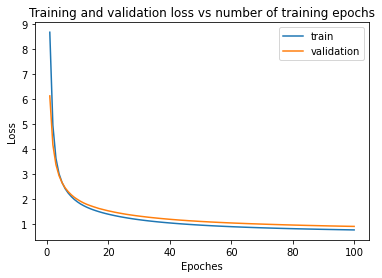

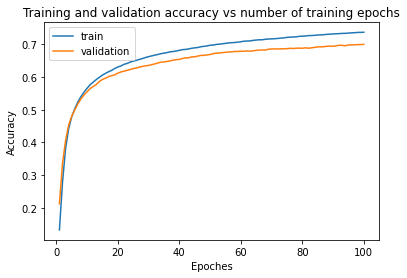

In [19]:
# Plots
plt.figure(1)
plt.plot(recording['epoches'], recording['train_loss'], label='train')
plt.plot(recording['epoches'], recording['valid_loss'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.title('Training and validation loss vs number of training epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(recording['epoches'], recording['train_accuracy'], label='train')
plt.plot(recording['epoches'], recording['valid_accuracy'], label='validation')
plt.xlabel('Epoches')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs number of training epochs')
plt.legend()
plt.show()